In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

Data = pd.read_csv("../Data/smalldata.csv")
#print(Data.head())

#Steage 1
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime','appearedTimeOfDay', 'appearedHour','appearedMinute',\
             'appearedDay',  'appearedMonth',  'appearedYear','terrainType', 'closeToWater', 'gymDistanceKm','city', 'continent','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure','class' ]
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedHour','appearedMinute',\
            'terrainType', 'closeToWater', 'gymDistanceKm','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure',\
            'class' ]
ReducedData = Data.loc[:, Selection]
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,Foggy,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,Foggy,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,Clear,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,PartlyCloudy,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,PartlyCloudy,15.6,5.84,160,1020.52,133


In [6]:
ReducedData['weather']= ReducedData['weather'].astype('category')
catedict = dict(enumerate(ReducedData['weather'].cat.categories))
ReducedData['weather'] = ReducedData['weather'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,4,15.6,5.84,160,1020.52,133


In [7]:
ReducedData['closeToWater'] = ReducedData['closeToWater'].astype('category')
catedict2 = dict(enumerate(ReducedData['closeToWater'].cat.categories))
ReducedData['closeToWater'] = ReducedData['closeToWater'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,0,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,0,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,0,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,1,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,1,0.210543,4,15.6,5.84,160,1020.52,133


In [8]:
Datamaxtrix = ReducedData.as_matrix()


/home/tl2861/anaconda3/envs/BASEMAP/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
x = np.array(Datamaxtrix[:,3:-1])
y = np.array(Datamaxtrix[:,1:3])
print(np.shape(x))
print(np.shape(y))

(300, 10)
(300, 2)


In [10]:
randomindex = np.random.choice(300, 300, replace=False)

In [11]:
#Reindex
x = x[randomindex,:]
y = y[randomindex,:]
#Split into Training and Testing
x_train = x[0:280,:]
x_test = x[280:300,:]
y_train = y[0:280,:]
y_test = y[280:300,:]
print(np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test))

(280, 10) (20, 10) (280, 2) (20, 2)


In [14]:
from sklearn import linear_model
from sklearn import ensemble

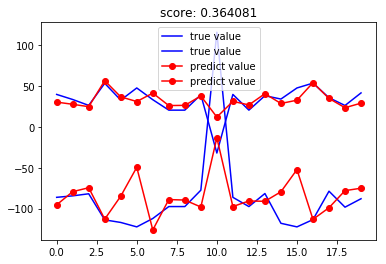

In [15]:
model_LinearRegression = linear_model.LinearRegression()
model = model_LinearRegression 
model.fit(x_train,y_train)
score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,'b',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()

## Plot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
latitude = result.transpose()[0]
print (latitude)
longitude = result.transpose()[1]
print(longitude)

NameError: name 'result' is not defined

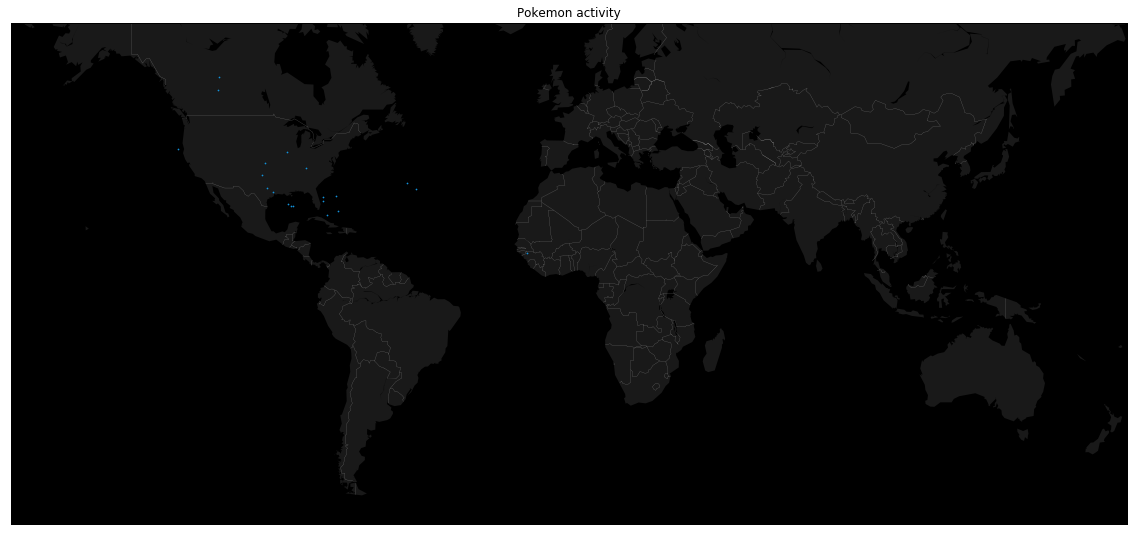

In [24]:
plt.figure(1, figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')


m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
x, y = m1(longitude,latitude)
m1.scatter(x,y, s=3, c="#1292db", lw=0, alpha=1, zorder=5)
plt.title("Pokemon activity")
plt.show()

In [52]:
predict_latitude = pd.read_csv("../Result/predict_latitude.csv")
predict_longitude = pd.read_csv("../Result/predict_longitude.csv")
true_latitude = pd.read_csv("../Result/true_latitude.csv")
true_longitude = pd.read_csv("../Result/true_longitude.csv")

In [53]:
predict_latitude.head()

,Unnamed: 0,Predict_latitude
0,0,48.223936
1,1,3.807657
2,2,42.589273
3,3,34.970166
4,4,48.031649


In [55]:
predict_longitude.head()

,Unnamed: 0,true longitude
0,0,14.912360
1,1,120.288437
2,2,-51.131411
3,3,-103.200015
4,4,-40.330373


In [56]:
true_latitude.head()

,Unnamed: 0,True_latitude
0,0,50.060746
1,1,4.594663
2,2,42.380350
3,3,33.311502
4,4,47.211035


In [57]:
true_longitude.head()

,Unnamed: 0,True_longitude
0,0,14.506891
1,1,114.244019
2,2,-71.144063
3,3,-112.054390
4,4,10.146040


In [47]:
np.shape(predict_latitude)

(88807, 2)

In [49]:
np.shape(true_latitude)

(88807, 2)

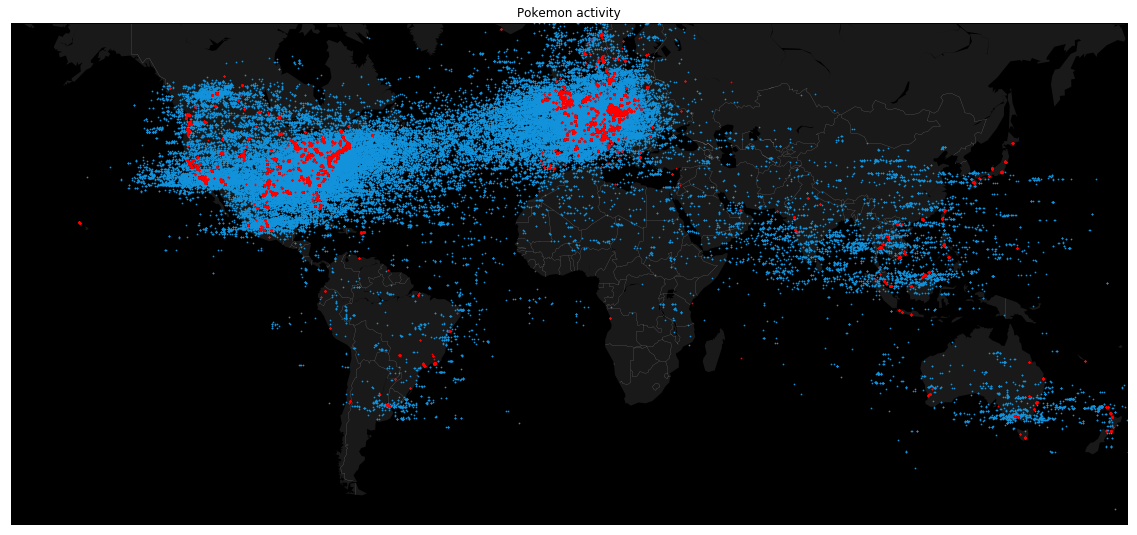

In [58]:
plt.figure(figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')


m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
x, y = m1(predict_longitude['true longitude'].tolist(),predict_latitude['Predict_latitude'].tolist())
# m2 = Basemap(projection='merc',
#              llcrnrlat=-60,
#              urcrnrlat=65,
#              llcrnrlon=-180,
#              urcrnrlon=180,
#              lat_ts=0,
#              resolution='c')


# m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
# m2.drawmapboundary(fill_color='#000000')                # black background
# m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

x_1,y_1 = m1(true_longitude['True_longitude'].tolist(),true_latitude['True_latitude'].tolist())
m1.scatter(x,y, s=3, c="#1292db", lw=0, alpha=1, zorder=5)
m1.scatter(x_1,y_1, s=3, c='r', lw=0,alpha=1,zorder=5)
plt.title("Pokemon activity")
plt.show()


In [10]:
true = pd.read_csv("../Result/city.csv")
true.head()

,Unnamed: 0,city
0,0,59
1,1,59
2,2,65
3,3,52
4,4,52


In [4]:
predict = pd.read_csv("../Result/Predict_city.csv")
predict.head()

,Unnamed: 0,0
0,0,Tokyo
1,1,Rome
2,2,Manila
3,3,Prague
4,4,Madrid


In [8]:
cnt = true.groupby('city')['city'].size()
cnt_p = predict.groupby('0')['0'].size()
type(cnt)
# cnt = cnt.to_frame()
label1 = pd.DataFrame(['true']*len(cnt.index),columns=['label'])
# print (label1)
# cnt = cnt
# cnt.head()
df_cnt = pd.concat([cnt,label1['label']],axis=1)
# df_cnt

# df_cnt = pd.concat([cnt,cnt_p])
# df_cnt.head()

In [ ]:
data = (
    df.set_index('index')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

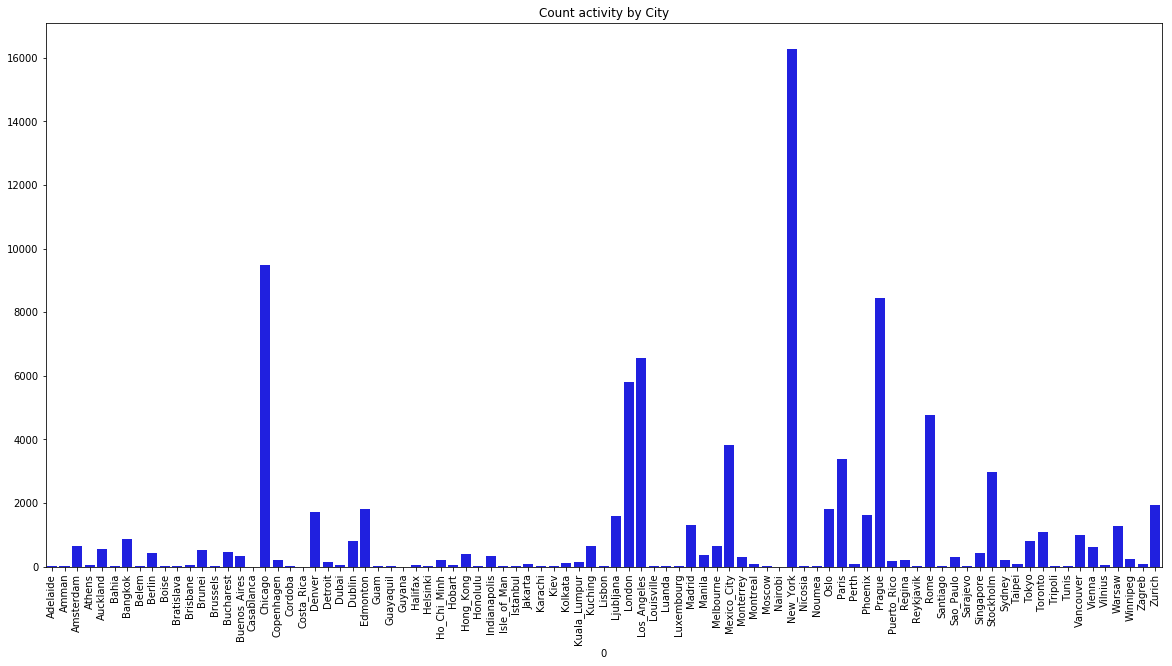

In [6]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cnt_p.index, y=cnt_p.values, color='b', ax=ax)
plt.xticks(rotation=90)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")

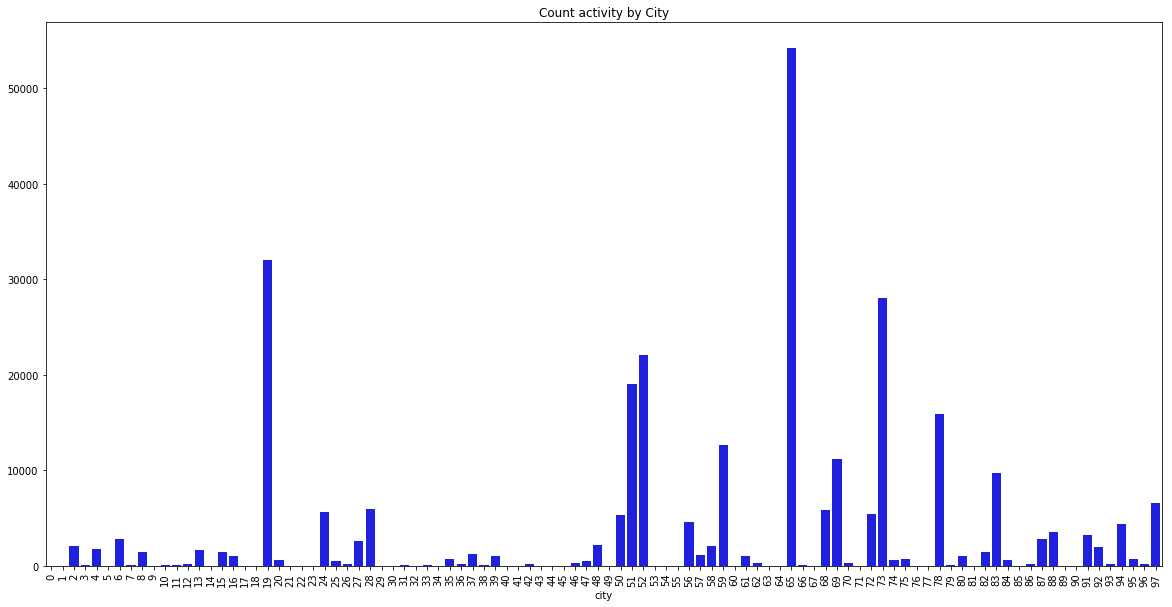

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cnt.index, y=cnt.values, color='b', ax=ax)
plt.xticks(rotation=90)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")